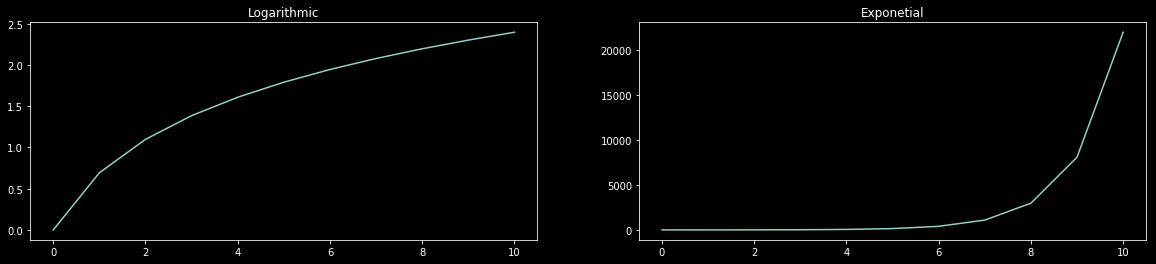

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('dark_background')
x = np.arange(11)
f, ax = plt.subplots(1, 2, figsize = [20, 4])

ax[0].set_title("Logarithmic")
ax[0].plot(x, np.log1p(x))

ax[1].set_title('Exponetial')
ax[1].plot(x, np.exp(x))


In [19]:
X = np.random.randint(0, 15, size = (4,3))
B = np.ones(shape = 3)
X, B

(array([[14,  3, 13],
        [10,  8,  1],
        [12, 12, 11],
        [ 5,  8,  7]]), array([1., 1., 1.]))

In [36]:
mat = np.random.randn(3,3)
mat_ex = np.array([[4,3],
                   [3,2]])
np.dot(np.linalg.inv(mat_ex), mat_ex)

array([[1., 0.],
       [0., 1.]])

In [1]:
from sklearn.datasets import make_classification
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np

In [2]:
use_default = True
if use_default:
    X, y = load_iris(return_X_y = True)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 0)
else:
    X, y = make_classification(n_samples = 500, n_features = 5, n_informative = 3, n_classes = 2, random_state = 7)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 4)

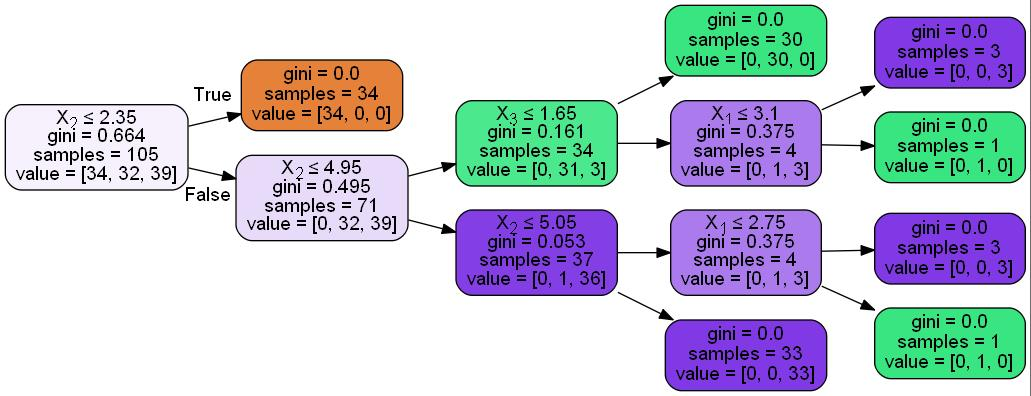

In [3]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
import pydotplus

dt = DecisionTreeClassifier(criterion = 'gini', splitter = 'best')
train = dt.fit(X_train, y_train)

dot_data = StringIO()
export_graphviz(decision_tree = dt, out_file = dot_data, filled = True, rounded = True, special_characters = True, rotate = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_jpeg())

In [4]:
def class_counts(data):
    ind, count = np.unique(data[:, -1], return_counts = True)
    return dict(zip(ind, count))

In [5]:
def calculate_gini(data):
    impurity = 1.0
    counts = class_counts(data)
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(data))
        impurity -= prob_of_lbl**2
    return impurity

In [6]:
def information_gain(left_node, right_node, current_uncertainity):
    p = float(len(left_node)) / float(len(left_node)) + float(len(right_node))
    uncertainity = current_uncertainity - p * calculate_gini(left_node) - (1 - p) * calculate_gini(right_node)
    return uncertainity

In [7]:
def best_split(all_gains, data):
    gain, features, values = zip(*all_gains)
    #print(gain)
    ind = np.argmin(gain)
    left_node = data[data[:, features[ind]] <= values[ind], :]
    right_node = data[data[:, features[ind]] > values[ind], :]
    print(f'Splitting on value: {values[ind]} of feature: {features[ind]}', )
    return left_node, right_node

In [8]:
def find_best_value(data, feature, value):
    left_node = data[data[:, feature] <= value]
    right_node = data[data[:, feature] > value]
    return left_node, right_node

In [9]:
def find_feature_split(data):
    current_uncertainity = calculate_gini(data)
    features = data.shape[1] - 1
    all_gains = []
    for feature in range(features):
        values = np.unique(data[:, feature])
        for value in values:
            left_node, right_node = find_best_value(data, feature, value)
            gain = information_gain(left_node, right_node, current_uncertainity)
            all_gains.append((gain, feature, value))

    return best_split(all_gains, data)

In [10]:
training_data = np.c_[X_train, y_train]
left_node, right_node = find_feature_split(training_data)
left_node.shape[0], right_node.shape[0]

Splitting on value: 5.0 of feature: 2


(72, 33)

In [11]:
def build_tree(data):
    current_gini = calculate_gini(data)
    left_node, right_node = find_feature_split(data)
    
    while 1:
        left_gini = calculate_gini(left_node)
        right_gini = calculate_gini(right_node)
        
        if left_gini != 0:
            left_node, right_node = find_feature_split(left_node)
            left_gini = calculate_gini(left_node)
        
        if right_gini != 0:
            left_node, right_node = find_feature_split(right_node)
            right_gini = calculate_gini(right_node)
            
        if left_gini == 0 and right_gini == 0:
            break
            
build_tree(training_data)

Splitting on value: 5.0 of feature: 2
Splitting on value: 3.3 of feature: 1
Splitting on value: 5.5 of feature: 0
Splitting on value: 2.5 of feature: 1
Splitting on value: 1.5 of feature: 3
Splitting on value: 5.7 of feature: 0
